In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 주피터 노트북을 사용하는 경우에는 다음처럼 매직(magic) 명령으로 노트북 내부에 그림을 표시하도록 지정해야 한다.
%matplotlib inline

In [2]:
data = pd.read_csv('a.txt',sep=']')
data

,[time,[pid,", cpuburst"
0,[ 15.227876,[Pid:266,", CPUburst : 136113"
1,[ 16.336105,[Pid:244,", CPUburst : 6223"
2,[ 17.131956,[Pid:259,", CPUburst : 31329"
3,[ 17.168658,[Pid:934,", CPUburst : 108909"
4,[ 17.980601,[Pid:590,", CPUburst : 347184"
...,...,...,...
8870,[ 2023.507841,[Pid:1776,", CPUburst : 168286"
8871,[ 2023.579998,[Pid:1357,", CPUburst : 555884"
8872,[ 2024.140012,[Pid:2002,", CPUburst : 363666"
8873,[ 2024.247386,[Pid:1775,", CPUburst : 454134"


In [3]:
data.columns=['time','pid','burst']

In [4]:
data['time']=data['time'].str.replace('[','')

In [5]:
data['pid']=data['pid'].str.replace(pat=r'[^0-9]', repl=r' ', regex=True) 

In [6]:
data['burst']=data['burst'].str.replace(pat=r'[^0-9]', repl=r' ', regex=True) 

In [7]:
data=data.astype({'time':'float','pid':'int','burst':'int'})

In [8]:
data.dtypes

time     float64
pid        int32
burst      int32
dtype: object

In [9]:
data

,time,pid,burst
0,15.227876,266,136113
1,16.336105,244,6223
2,17.131956,259,31329
3,17.168658,934,108909
4,17.980601,590,347184
...,...,...,...
8870,2023.507841,1776,168286
8871,2023.579998,1357,555884
8872,2024.140012,2002,363666
8873,2024.247386,1775,454134


In [10]:
data.to_csv('C:\\Users\\hyuna\\Desktop\\os\\data.csv', sep=',', na_rep='NaN')

In [11]:
count=data['burst'].value_counts()

In [12]:
count.sort_values(ascending=False)

4031      3
8889      3
67970     2
13227     2
8038      2
         ..
20350     1
1919      1
585602    1
159706    1
44874     1
Name: burst, Length: 8716, dtype: int64

In [13]:
count=pd.DataFrame(count)
count.reset_index()

,index,burst
0,4031,3
1,8889,3
2,36835,2
3,68747,2
4,42658,2
...,...,...
8711,164533,1
8712,432822,1
8713,27207,1
8714,45755,1


In [14]:
count.rename(columns = {"index": "burst"}, inplace = True)
count.rename(columns = {"burst": "frequency"}, inplace = True)

In [15]:
count.reset_index()

,index,frequency
0,4031,3
1,8889,3
2,36835,2
3,68747,2
4,42658,2
...,...,...
8711,164533,1
8712,432822,1
8713,27207,1
8714,45755,1


In [17]:
count['index'].sort_values(ascending=False,inplace=True)

KeyError: 'index'

In [21]:
data.to_excel('C:\\Users\\hyuna\\Desktop\\os\\data.xlsx')

In [20]:
count.to_excel('C:\\Users\\hyuna\\Desktop\\os\\count.xlsx')

Text(0, 0.5, 'frequency')

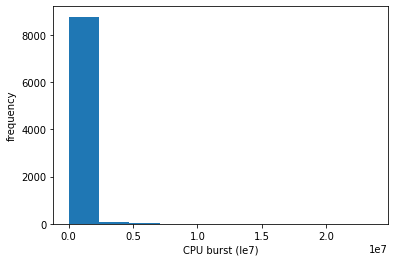

In [42]:
plt.hist(data['burst'])
plt.xlabel('CPU burst (le7)')
plt.ylabel('frequency')
#자동으로 자연로그 변환

Text(0, 0.5, 'frequency')

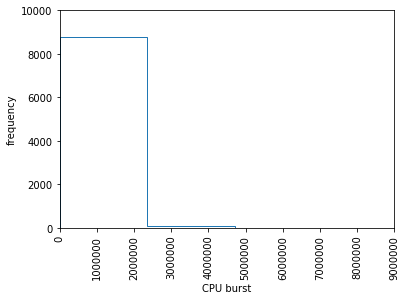

In [51]:
plt.hist(data['burst'],histtype='step')
plt.xlim(0,9000000)
plt.xticks(rotation=90)
plt.ylim(0,10000)
plt.xlabel('CPU burst')
plt.ylabel('frequency')
#실제 값

In [30]:
a=data['burst']/1000000
a

0       0.136113
1       0.006223
2       0.031329
3       0.108909
4       0.347184
          ...   
8870    0.168286
8871    0.555884
8872    0.363666
8873    0.454134
8874    0.019007
Name: burst, Length: 8875, dtype: float64

Text(0, 0.5, 'frequency')

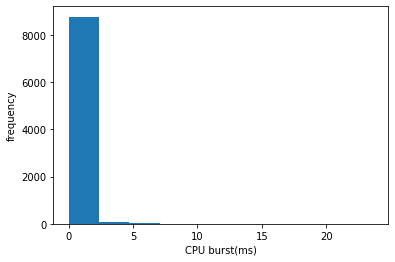

In [44]:
plt.hist(a)
plt.xlabel('CPU burst(ms)')
plt.ylabel('frequency')
#ms 단위로 출력

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000., 8000000., 9000000.]),
 <a list of 10 Text xticklabel objects>)

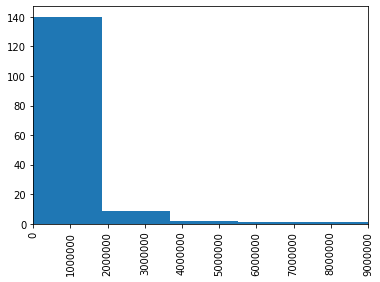

In [47]:
test=data[data['pid']==1330]
plt.hist(test['burst'])
plt.xlim(0,9000000)
plt.xticks(rotation=90)
#pid 1330에 대하여 실제값 출력

(array([140.,   9.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.95300000e-03, 1.83695250e+00, 3.67195200e+00, 5.50695150e+00,
        7.34195100e+00, 9.17695050e+00, 1.10119500e+01, 1.28469495e+01,
        1.46819490e+01, 1.65169485e+01, 1.83519480e+01]),
 <a list of 10 Patch objects>)

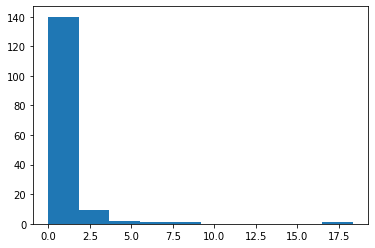

In [48]:
b=test['burst']/1000000
plt.hist(b)
#pid 1330에 대하여 ms단위 출력